# MoMA Gender Diversity Analysis

The goal of this analysis is to analyze MoMA data to determine artist gender diversity from the museum's inception to the present. In addition, to compare the MoMA diversity data with the art history textbook data. In this analysis, I will attempt to do the following:
1. Calculate the percentage of artists represented in MoMA's collection (male, female, transgender, non-binary, and transgender), and visualize these percentages in a bar chart.
2. Use a times series analysis to determine whether or not MoMA's artist gender diversity improved over time, and visualize these percentage changes on a plot line. 
3. Was there an increase in gender diversity after the museum's 2019 renovation and expansion?
4. What percentage of artists in the art history textbooks are male, female, non-binary, and transgender?
5. How many artists represented in MoMA's collection are also listed in the art history textbooks?

First, I will read in the clean MoMA data: 

In [59]:
import pandas as pd

# Reading in the MoMA clean data csv and viewing the first five rows. 
moma_analyze = pd.read_csv("../data/clean/clean_artworks.csv")
moma_analyze.head(5)

,title,artist,date_acquired,gender_list
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,1996-04-09,(male)
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1995-01-17,(male)
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,1997-01-15,(male)
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,1995-01-17,(male)
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,1997-01-15,(male)


As a reminder, I will view the gender counts for the MoMA clean data.

In [60]:
moma_analyze['gender_list'].value_counts().to_frame()

,count
gender_list,
(male),130515
(female),21943
(transgender),63
(non-binary),17
(non-conforming),2


1. Next, I will calculate the percentage of each gender.

In [61]:
gender_counts = moma_analyze['gender_list'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
print(gender_percentages)

gender_list
(male)              85.561164
(female)            14.385079
(transgender)        0.041301
(non-binary)         0.011145
(non-conforming)     0.001311
Name: count, dtype: float64


Next, I will visualize these percentages in a pie chart using matplotlib and seaborn. 

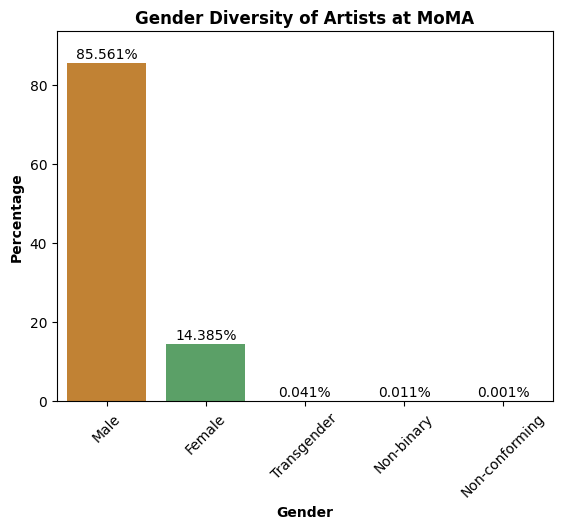

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating custom colors. 
custom_colors=['#d9851c', '#50ab5f', '#7556a2', '#d3cb29', '#83b9bd']
# Creating the bar chart. Had to set hue to x to avoid deprecated warning.
ax_1 = sns.barplot(x=gender_percentages.index, y=gender_percentages.values, hue=gender_percentages.index, palette=custom_colors, legend=False)

# This will add percentages to each bar in the chart. Had to use 3 decimal places because the transgender, 
# non-binary, and non-conforming populations were so small. 
for i, percentage in enumerate(gender_percentages.values):
    ax_1.text(i, percentage + 0.5, f'{percentage:.3f}%', ha='center', va='bottom', fontsize=10)

# This section customizes the bar chart. 
plt.title('Gender Diversity of Artists at MoMA', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylim(0, max(gender_percentages.values) + 8)  # This will add space to the top of the bars. 
plt.xticks(rotation=45) # This will rotate the x axis labels.
ax_1.set_xticks([0, 1, 2, 3, 4]) # Had to add due to warning. 
ax_1.set_xticklabels(['Male', 'Female', 'Transgender', 'Non-binary', 'Non-conforming']) 
# This will update the x axis labels (remove parentheses and capitalize). 
plt.show()

2. Next, I will start my time series analysis to determine if MoMA's gender diversity improved over time. 

In [81]:
# Even though date_acquired was changed to a datetime in the data cleaning process, 
# I continued to receive an error that it was not a datetime. Trying this method to see if I can fix it. 
moma_analyze['date_acquired'] = pd.to_datetime(moma_analyze['date_acquired'], errors='coerce')

In [82]:
# Double checking to make sure I don't have any missing dates. I already did this in the cleaning process. 
moma_analyze['date_acquired'].isna().sum()

np.int64(0)

In [ ]:
# First, I need to get the years from the date_acquired column.
moma_analyze['year_acquired'] = moma_analyze['date_acquired'].dt.year

# Next, I can use groubpy to see how many pieces of art were acquired each year, for each gender. 
gender_per_year = moma_analyze.groupby(['year_acquired', 'gender_list']).size().unstack(fill_value=0)
print(gender_per_year)


gender_list    (female)  (male)  (non-binary)  (non-conforming)  (transgender)
year_acquired                                                                 
1929                  0       9             0                 0              0
1930                  0       7             0                 0              0
1931                  0       3             0                 0              0
1932                  1      18             0                 0              0
1933                  0      93             0                 0              0
...                 ...     ...           ...               ...            ...
2020                207    2482             1                 0              0
2021                559     472             0                 0              0
2022                400     329             0                 0              0
2023                234     408             0                 0              1
2024                141     327             0       

Next, I will create a line graph to visualize this change over time. 

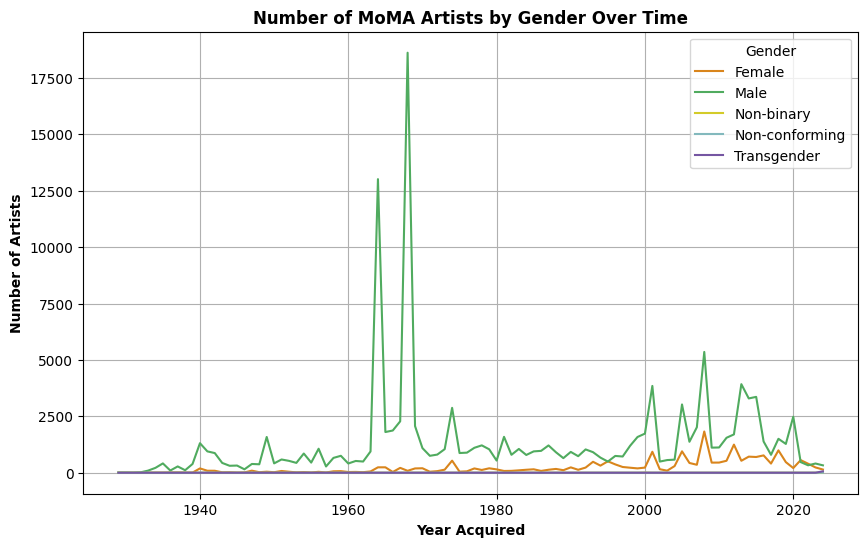

In [84]:
# Creating custom colors and labels to match the bar chart. 
custom_colors_2 =['#d9851c', '#50ab5f', '#d3cb29', '#83b9bd', '#7556a2']
custom_labels = ['Female', 'Male', 'Non-binary', 'Non-conforming', 'Transgender']

# Creating the line graph with the custom colors and thicker line. 
ax_2 = gender_per_year.plot(kind='line', figsize=(10, 6), color=custom_colors_2, linewidth=1.5)

plt.title('Number of MoMA Artists by Gender Over Time', fontweight='bold')
plt.xlabel('Year Acquired', fontweight='bold')
plt.ylabel('Number of Artists', fontweight='bold')
plt.legend(custom_labels, title='Gender') # Using the custom_labels to remove parentheses from data set. 
plt.grid(True)
plt.show()